In [1]:
import sys
import os

# Get the current working directory (where the notebook is running)
SCRIPT_DIR = os.getcwd()  # or use os.path.dirname(os.path.abspath('')) for similar effect
sys.path.append(os.path.dirname(SCRIPT_DIR))

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()

from som import SOM

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA


Iter: 1: inertia: 81.31 | Learning Rate: 0.990 | Neighbourhood factor: 4.950
Iter: 2: inertia: 80.52 | Learning Rate: 0.980 | Neighbourhood factor: 4.901
Iter: 3: inertia: 80.38 | Learning Rate: 0.970 | Neighbourhood factor: 4.852
Iter: 4: inertia: 80.20 | Learning Rate: 0.961 | Neighbourhood factor: 4.804
Iter: 5: inertia: 79.38 | Learning Rate: 0.951 | Neighbourhood factor: 4.756
Iter: 6: inertia: 79.39 | Learning Rate: 0.942 | Neighbourhood factor: 4.709
Iter: 7: inertia: 79.08 | Learning Rate: 0.932 | Neighbourhood factor: 4.662
Iter: 8: inertia: 77.64 | Learning Rate: 0.923 | Neighbourhood factor: 4.616
Iter: 9: inertia: 78.47 | Learning Rate: 0.914 | Neighbourhood factor: 4.570
Iter: 10: inertia: 78.26 | Learning Rate: 0.905 | Neighbourhood factor: 4.524
Iter: 11: inertia: 77.36 | Learning Rate: 0.896 | Neighbourhood factor: 4.479
Iter: 12: inertia: 77.30 | Learning Rate: 0.887 | Neighbourhood factor: 4.435
Iter: 13: inertia: 76.70 | Learning Rate: 0.878 | Neighbourhood factor: 4

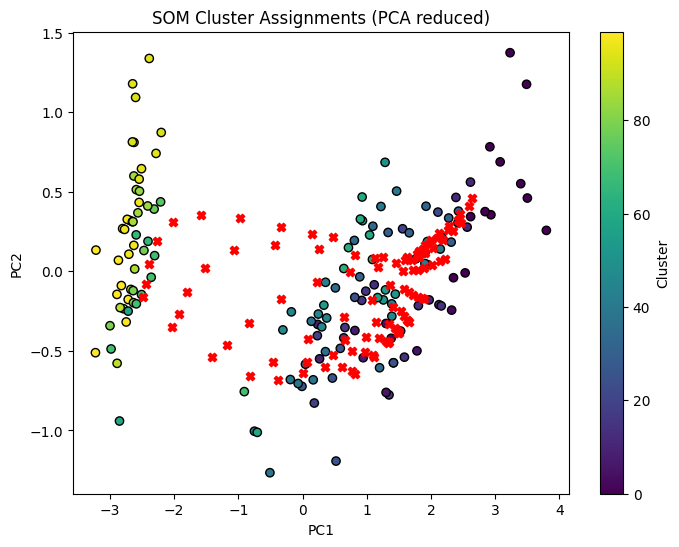

In [10]:
X = iris.data
y = iris.target

# Fit SOM
pred = SOM(max_iters=100, verbose=True)
pred.fit(X)

# Predict cluster assignments
grid_coords = pred.predict(X)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

grid_coords_2d = pca.transform(pred.weights_.reshape(-1, 4))

# Plot clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=pred.labels_, cmap='viridis', edgecolor='k')
plt.scatter(grid_coords_2d[:, 0], grid_coords_2d[:, 1], c='red', marker='X')
plt.title("SOM Cluster Assignments (PCA reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label='Cluster')
plt.show()

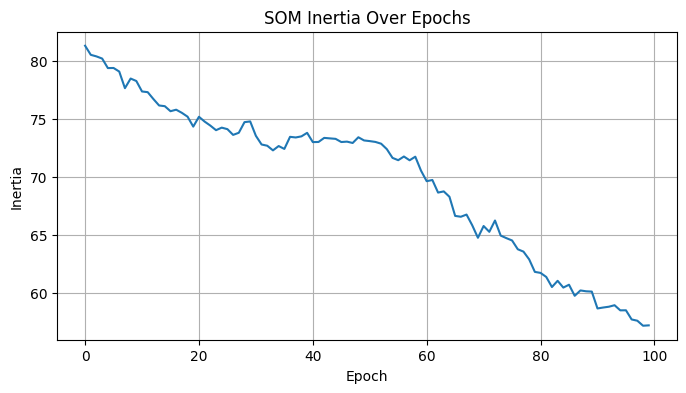

In [11]:
plt.figure(figsize=(8, 4))
plt.plot(pred.inertia_history_)
plt.title("SOM Inertia Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


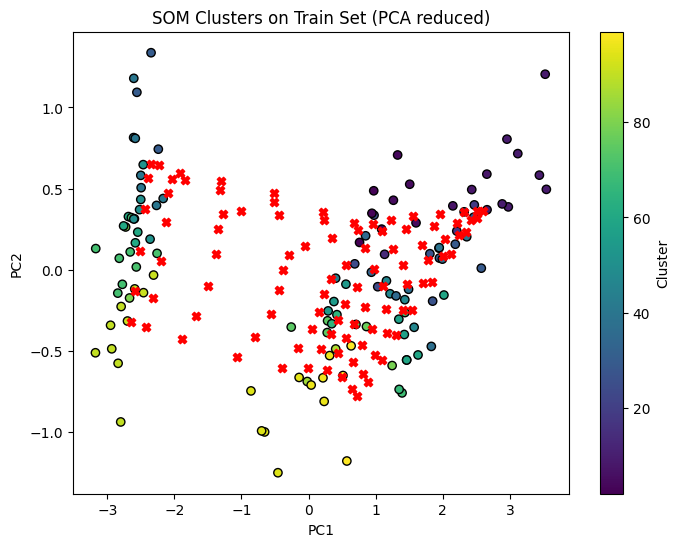

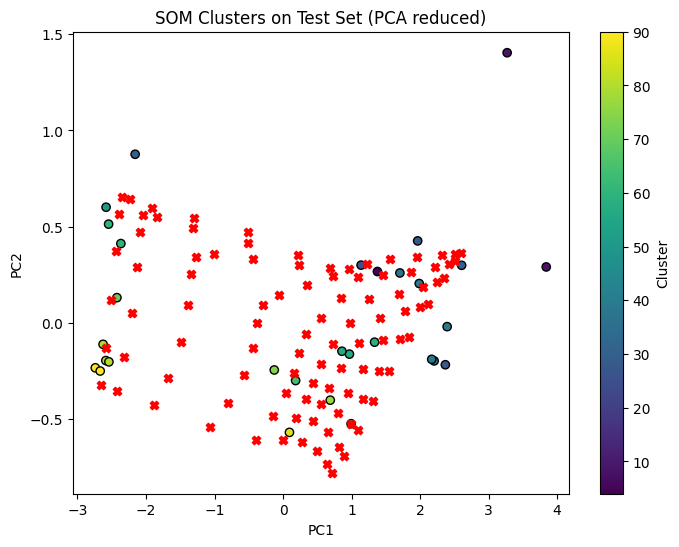

In [12]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train on train set
pred = SOM(max_iters=500)
pred.fit(X_train)

# Predict on test set
test_grid_coords = pred.predict(X_test)

# Visualize test predictions
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
grid_coords_2d = pca.transform(pred.weights_.reshape(-1, 4))

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=pred.labels_, cmap='viridis', edgecolor='k')
plt.scatter(grid_coords_2d[:, 0], grid_coords_2d[:, 1], c='red', marker='X')
plt.title("SOM Clusters on Train Set (PCA reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label='Cluster')
plt.show()


X_test_2d = pca.transform(X_test)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=[pred.coord_label_map_.get(tuple(c)) for c in test_grid_coords], cmap='viridis', edgecolor='k')
plt.scatter(grid_coords_2d[:, 0], grid_coords_2d[:, 1], c='red', marker='X')
plt.title("SOM Clusters on Test Set (PCA reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label='Cluster')
plt.show()
